# 資料輸入輸出
### 曾聖澧
### Feb 25, 2019
---

# ***簡單內建檔案操作***

* Windows下路徑(path)必須改用 / 或 \\\\ ，
或是直接以檔案總管選取檔案可用 filedialog.askopenfilename() 。 (需要導入 tkinter.filedialog 模塊)<br>
fnmatch.filter( os.listdir(path),  "\*pattern\*" ) 列出 path 下符合 pattern 的檔名。<br>
os.listdir() 則回報目前工作目錄內容。 (需 import os 和 import fnmatch) <br>


* sys.path 查看 Python 安装位置。 (需 import sys) <br>
os.getcwd() 可查詢目前工作路徑，更改路徑使用 os.chdir(目錄路徑) 。<br>


* os.stat(path) 可獲取文件的詳細信息<br>
(st_mode 文件類型和權限，st_ino 索引節點號，st_dev 設備編號，st_uid 文件所有者 ID，st_gid 文件組標識，st_size 文件大小) <br>
os.path.basename(path) 列出 path 中的檔案名，os.path.dirname(path) 則列出其上一層的目錄名稱。<br>


* mkdir() 和 makedirs() 兩種方法建立新的資料夾，mkdir() 建立一層目錄，makedirs() 建立多層目錄。<br>


* 複製文件( import shutil，os 裡也有類似功能)

|函數	|複製元數據	|複製權限	|使用文件對象	|目的地可能是目錄|
|:---:|:---:|:---:|:---:|:---:|
|[shutil.copy](https://docs.python.org/3/library/shutil.html#shutil.copy)	|不	|可	|不	|可|
|[shutil.copyfile](https://docs.python.org/3/library/shutil.html#shutil.copyfile)	|不	|不	|不	|不|
|[shutil.copy2](https://docs.python.org/3/library/shutil.html#shutil.copy2)	|可	|可	|不	|可|
|[shutil.copyfileobj](https://docs.python.org/3/library/shutil.html#shutil.copyfileobj)	|不	|不	|可	|不|

* os.rename()，os.remove(path) 功能如同其指令名稱易懂。<br>
刪除檔案也可以用 os.unlink(path) 等等。

# ***讀入程式檔***

語法：exec( open( 程式路徑 ).read() )

先產生程式碼

In [1]:
# 打開 .txt 文件
# 我們在參數中使用了 “w”，表示 Python 寫入文件，如果不存在，它將在 Python 中創建文件
with open("test.txt", "w") as fileObject: 
    fileObject.writelines(["N = len(trees)\n",
       "plt.subplot(211)\n",
       "plt.scatter(\"Height\",\"Volume\",s = trees[\"Girth\"]*12,c = \"white\",edgecolors = \"black\",data = trees)\n",
       "plt.title('Trees Girth')\n",
       "plt.xlabel(\"Height\")\n",
       "plt.ylabel(\"Volume\")\n",
       "time.sleep(5)\n",
       "plt.subplot(212)\n",
       "op = sns.color_palette(\"Pastel2\",N)\n",
       "plt.scatter(\"Height\",\"Volume\",s = trees[\"Girth\"]*12,c = op,edgecolors = \"black\",data = trees)\n",
       "plt.xlabel(\"Height\")\n",
       "plt.ylabel(\"Volume\")"])
    fileObject.close()

看看剛剛的檔案內容

In [2]:
open("test.txt").read()

'N = len(trees)\nplt.subplot(211)\nplt.scatter("Height","Volume",s = trees["Girth"]*12,c = "white",edgecolors = "black",data = trees)\nplt.title(\'Trees Girth\')\nplt.xlabel("Height")\nplt.ylabel("Volume")\ntime.sleep(5)\nplt.subplot(212)\nop = sns.color_palette("Pastel2",N)\nplt.scatter("Height","Volume",s = trees["Girth"]*12,c = op,edgecolors = "black",data = trees)\nplt.xlabel("Height")\nplt.ylabel("Volume")'

執行檔案

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [4]:
trees = pd.read_csv(r"C:\Users\user\Desktop\01_data\trees.csv")

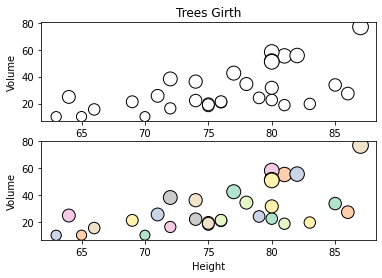

In [5]:
exec(open("test.txt").read())

刪除檔案

In [6]:
import os

In [7]:
os.unlink("test.txt")

# ***讀入不同格式資料檔***

ID |SCORE       | AGE | GENDER
-----------|-----------|------------|---------
1 |50 |23 |F
2 |55 |22 |M
3 |40 |24 |M
4 |45 |26 |F
5 |36 |21 |M
6 |48 |25 |F

```
先開啟 Excel 輸入上表資料，存成 example.xls 與 example.xlsx。 
然後轉換成逗號分隔 (examle.csv)，tab 分隔 (example.txt) 的檔案格式。
另外刪除性別那一欄，另存成逗號分隔的 "nogender.csv"。 
```

## readlines

看一下內容

In [8]:
os.chdir(r"C:\Users\user\Desktop\01_data") 

In [9]:
os.startfile("nogender.csv")

用 read 讀入資料

In [10]:
open("nogender.csv", 'r').read()

'ID,score,age\n1,50,23\n2,55,22\n3,40,24\n4,45,26\n5,36,21\n6,48,25\n'

In [11]:
# 不含第一行文字
file = "".join((open("nogender.csv","r",newline= "").readlines()[1:]))
print(file)   
# join 函數是 python 中將列表轉換為字符串的最簡單方法之一

# 只讀檔案中一行資料
print("".join(open("nogender.csv", 'r').readlines()[1:2]))

1,50,23
2,55,22
3,40,24
4,45,26
5,36,21
6,48,25

1,50,23



看一下剛剛自己建的資料

In [12]:
os.startfile("example.csv")

逐行讀進文字

In [13]:
open("example.csv", 'r').readlines()

['ID,score,age,sex\n',
 '1,50,23,F\n',
 '2,55,22,M\n',
 '3,40,24,M\n',
 '4,45,26,F\n',
 '5,36,21,M\n',
 '6,48,25,F\n']

打開剛才自己建立的xls檔案，用滑鼠選取數列複製到剪貼簿。<br>
以下示範讀取剪貼簿中的複製文字<br>

```
有三個專門用於執行剪貼板操作的 python 模塊（pyperclip、pyperclip3、clipboard）
Python 中還有一些包，內置了執行剪貼板操作的方法，
例如 : pandas 的 to_clipboard、tkinter、PyQT 都有自己的方法來執行剪貼板操作。
```

In [14]:
pip install pyperclip

Note: you may need to restart the kernel to use updated packages.


In [15]:
import pyperclip as pc 
# x = "Data to be copied to clipboard" 
# pc.copy(x) 
a = pc.paste() 
print(a)

* [讀取格式不同方法](https://ithelp.ithome.com.tw/articles/10213911)


## requests 
可讀入網路上文章<br>
更強調提供高度即時性的資料,譬如最新的匯率或是氣象狀況。

In [16]:
import requests 

In [17]:
# 取回網址內容並存入回應物件
response = requests.get('http://stats.moe.gov.tw/files/detail/108/108_student.csv')

# 印出回應物件的文字
response.text 

'學校代碼,學校名稱,日間∕進修別,等級別,總計,男生計,女生計,一年級男生,一年級女生,二年級男生,二年級女生,三年級男生,三年級女生,四年級男生,四年級女生,五年級男生,五年級女生,六年級男生,六年級女生,七年級男生,七年級女生,延修生男生,延修生女生,縣市名稱,體系別\r\n0001,國立政治大學,D 日,D 博士,995,561,434,90,85,87,77,84,74,89,53,70,48,61,55,80,42,0,0,30 臺北市,1 一般\r\n0001,國立政治大學,D 日,M 碩士,4023,1861,2162,644,745,593,702,372,451,252,264,0,0,0,0,0,0,0,0,30 臺北市,1 一般\r\n0001,國立政治大學,D 日,B 學士,9585,3912,5673,896,1289,906,1309,883,1319,882,1333,0,0,0,0,0,0,345,423,30 臺北市,1 一般\r\n0001,國立政治大學,N 職,M 碩士,1787,929,858,298,273,266,233,185,190,110,96,70,66,0,0,0,0,0,0,30 臺北市,1 一般\r\n0002,國立清華大學,D 日,D 博士,1656,1211,445,241,85,206,90,179,64,163,60,140,43,122,44,160,59,0,0,18 新竹市,1 一般\r\n0002,國立清華大學,D 日,M 碩士,5190,3221,1969,1299,754,1231,659,475,321,209,211,3,14,4,10,0,0,0,0,18 新竹市,1 一般\r\n0002,國立清華大學,D 日,B 學士,8500,4658,3842,1105,925,1093,843,1075,945,1123,975,0,0,0,0,0,0,262,154,18 新竹市,1 一般\r\n0002,國立清華大學,D 日,X 4+X,39,25,14,3,2,20,12,0,0,0,0,0,0,0,0,0,0,2,0,18 新竹市,1 一般\r\n0002,國立清華大學,N 職,M 碩士,1293,479,814,191,269,170,217,35,114,26,92,23,43

In [18]:
# 以 .json結尾的網址稱為網路服務，存取它便能收到以特殊格式編成的資訊。
response = requests.get("https://data.epa.gov.tw/api/v2/uv_s_01?api_key=e8dd42e6-9b8b-43f8-991e-b3dee723a52d&limit=1000&sort=publishtime%20desc&format=JSON")

response.text

'{\n    "fields": [\n        {\n            "id": "sitename",\n            "type": "text",\n            "info": {\n                "label": "測站名稱"\n            }\n        },\n        {\n            "id": "uvi",\n            "type": "text",\n            "info": {\n                "label": "紫外線指數"\n            }\n        },\n        {\n            "id": "publishagency",\n            "type": "text",\n            "info": {\n                "label": "發布單位"\n            }\n        },\n        {\n            "id": "county",\n            "type": "text",\n            "info": {\n                "label": "縣市"\n            }\n        },\n        {\n            "id": "wgs84lon",\n            "type": "text",\n            "info": {\n                "label": "WGS84經度"\n            }\n        },\n        {\n            "id": "wgs84lat",\n            "type": "text",\n            "info": {\n                "label": "WGS84緯度"\n            }\n        },\n        {\n            "id": "publishtime",\n       

* 結果 :
```
 requests 直接把 csv 的內容用逗點分隔的純文字資料抓回來
 若直接下載這檔案再用 txt 純文字編輯器打開，會看到相同結果

 把網址更換成 紫外線即時監測資料-JSON，
 也是得到文字檔，但格式與前案例不同。
 以 .json結尾的網址稱為網路服務，存取它便能收到以特殊格式編成的資訊。
```

## 用 Python 匯入資料

Pandas 是 python 的一個數據分析模組，<br>
提供高效能、簡易使用的資料格式(Data Frame)讓使用者可以快速操作及分析資料，<br>
Pandas 強化了資料處理的方便性也能與處理網頁資料與資料庫資料等<br><br>

```
pandas 的 DataFrame 和 numpy 的 array，major order不同

在 NumPy 的 array 中，可以指定 major order，如果未指定，則預設情況下它是 row-major，
而 pandas 的 DataFrame 使用 column major。
使用 column major，如果要取某個 feature，就只要把其中一段連續的記憶體拆出來就好，
但 row major 就需要跳著拆，就會很慢，而且每種資料型態大小不一樣大，不同大小的東西排在一起也會讓讀取變慢。
```
[Pandas is Column-major](https://aman.ai/primers/pandas/#pandas-is-column-major)

## 以特定字元分隔之資料檔案(CSV，TXT等)

命令列指令是用 pandas.read_table, pandas.read_fwf, pandas.read_csv 等，<br>
可參考 [如何用 Pandas 讀取文本文件？](https://www.geeksforgeeks.org/how-to-read-text-files-with-pandas/)  <br>

這些其實都是純文字檔，讀檔時要特別注意是否有欄位名稱（變數名稱），以及分隔的符號是什麼？<br>

## EXCEL 檔案

In [19]:
import pandas as pd

A = pd.read_excel("example.xls")
B = pd.read_excel("example.xlsx")

print(A.head(),"\n\n",B.head())

   ID  score  age sex
0   1     50   23   F
1   2     55   22   M
2   3     40   24   M
3   4     45   26   F
4   5     36   21   M 

    ID  score  age sex
0   1     50   23   F
1   2     55   22   M
2   3     40   24   M
3   4     45   26   F
4   5     36   21   M


## SPSS 檔案

檔案副檔名 SAV 是一種由 IBM 開發的 SPSS Data File

In [20]:
pip install pyreadstat

Note: you may need to restart the kernel to use updated packages.


In [21]:
A = pd.read_spss("InagakiLong.sav")
A.head()

,ID,LocModelOrRecast,AdjModelOrRecast,PreAdj,PostAdj,PreLoc,PostLoc,GainAdj,GainLoc,GainKute
0,1.0,Model,Model,1.0,0.0,0.0,3.0,-1.0,3.0,0.0
1,11.0,Model,Model,0.0,3.0,0.0,3.0,3.0,3.0,3.0
2,2.0,Model,Model,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12.0,Model,Model,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,Model,Model,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## SAS 檔案

In [22]:
A = pd.read_sas("mixed_data_two.sas7bdat")
A.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21
0,1.0,1.100000,b'AAAAAAAA',1.100000,1.100000,1.100000,1.100000,1.100000,1.100000,1.100000,...,1.100000,1.100000,1.100000,3.162606e+07,3.162596e+07,3.162706e+07,3.161606e+07,3.163606e+07,3.152606e+07,3.172606e+07
1,2.0,1.062500,b'BBBBBBBB',1.066406,1.066650,1.066666,1.125000,1.187500,1.250000,1.312500,...,1.437500,1.500000,1.562500,3.787849e+08,3.787848e+08,3.787859e+08,3.787749e+08,3.787949e+08,3.786849e+08,3.788849e+08
2,3.0,1.066666,b'CCCC',1.066666,1.066666,1.066666,1.129166,1.191666,1.254166,1.316666,...,1.441666,1.504166,1.566666,7.260302e+08,7.260301e+08,7.260312e+08,7.260202e+08,7.260402e+08,7.259302e+08,7.261302e+08
3,4.0,1.070833,b'DDD',1.066927,1.066683,1.066668,1.133333,1.195833,1.258333,1.320833,...,1.445833,1.508333,1.570833,1.073275e+09,1.073275e+09,1.073276e+09,1.073265e+09,1.073285e+09,1.073175e+09,1.073375e+09
4,5.0,1.125000,b'EEE',1.070312,1.066895,1.066681,1.187500,1.250000,1.312500,1.375000,...,1.500000,1.562500,2.052268,1.262650e+09,1.262650e+09,1.262651e+09,1.262640e+09,1.262660e+09,1.262550e+09,1.262750e+09


## JSON 

這是一種網路上常見的檔案交換格式 <br>
可參考 [pandas.read_json](https://pandas.pydata.org/docs/reference/api/pandas.read_json.html)

## .mat檔

MATLAB 使用的二進制數據容器格式文件

In [23]:
import scipy.io as sio 

A = sio.loadmat("varTypes.mat")  # type(A) : dict
A.keys()

dict_keys(['__header__', '__version__', '__globals__', 'x', 'y', 'z', 'sample'])

## .Rdata 二進位檔

[讀取一個二進位制檔案](https://www.delftstack.com/zh-tw/howto/python/read-binary-files-in-python/)

In [24]:
import numpy as np

with open("termDocMatrix.Rdata") as f:
    rectype = np.dtype(np.int32)
    bdata = np.fromfile(f, dtype=rectype)

print(bdata)

# 在這裡，我們將格式型別指定為 32 位整數，並使用 fromfile() 函式提取資料

[     559903           0 -1645410816   920350431   617989652  -584920339
 -1887761402  1576969352  -306636915  -561270579   164673034  1455631797
  2052452016   333195193  -250981620 -1056854725 -1538636524  2085097427
  -543285460  1200702729   -17006188  2042470128 -1568004353 -1477777237
  1735784430 -1082827554  -784907170  1844834027   263593307  -648156467
 -1655707106  1951502279  1182027767  -830734913  1396403907  1993592537
  1743240958  -604416230 -1134758966  1905379667   636960589  1776788974
  -412273718  -280232150 -2048738865 -1749721322  -814878310 -1791663201
  1060820795 -1436467849  1839451813 -2021872226  2044525510  1273466188
   499453567 -1952630949 -1683494297  -529410873   -40993686 -1174640004
   533371122  1877633003  1709947306 -1352403245  -604348589  2002253303
  2062178430  -404849225  1586900890  1806527735  -561548989  -709642517
  1562143870 -1167149779  1022095210   165591780  1542958669   909098876
   676673525  -240147467   -50869593 -1894155116  2

## 使用Python套件中的資料

[sklearn.datasets: 數據集¶](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)

In [25]:
from sklearn import datasets

data = datasets.load_iris()    
data.keys()

# print(data["DESCR"])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

# ***輸出資料***

## 給人看或給其他程式用

常用有 print，file.write，file.writelines，dataframe.to_csv <br>
可參考 [Python 初學第十二講—檔案處理](https://medium.com/ccclub/ccclub-python-for-beginners-tutorial-bf0648108581)

## .csv

In [26]:
dataframe = pd.read_csv("example.csv")
dataframe.to_csv("example0.csv")

## .mat檔
一次可以不只存一個變數，是以字典的形式保存

In [27]:
print(type(A),"\n")
print(A["x"],"\n\n",A["y"])

<class 'dict'> 

[[(array([[ 127,    0, -128]], dtype=int8), array([[255],
         [  0],
         [  0]], dtype=uint8), array([[ 32767,      0, -32768]], dtype=int16), array([[ 2147483647,           0, -2147483648]]), array([[ 9223372036854775807,                    0, -9223372036854775808]],
        dtype=int64), array([[65535],
         [    0],
         [    0]], dtype=uint16), array([[4294967295],
         [         0],
         [         0]], dtype=uint32), array([[18446744073709551615],
         [                   0],
         [                   0]], dtype=uint64), array(['test string'], dtype='<U11'), array([[1.79769313e+308, 0.00000000e+000, 2.22507386e-308]]), array([[3.4028235e+38, 0.0000000e+00, 1.1754944e-38]], dtype=float32), array([[array(['test'], dtype='<U4')],
         [array(['string'], dtype='<U6')]], dtype=object), array([[1, 0]], dtype=uint8))                                                                                                                        

In [28]:
sio.savemat("dataNew.mat",{"x":A["x"],"y":A["y"]})

## 壓縮檔
產生一個壓縮檔

In [29]:
from zipfile import ZipFile
 
# create ZipFile object
zip_fp = ZipFile('my-archives.zip', 'w')
 
# Add files to the zip
zip_fp.write("example.csv")
zip_fp.write("varTypes.mat")

# close the Zip File
zip_fp.close()

讀入壓縮檔的作法只是 " w " 改成 " r "

In [30]:
z = ZipFile('my-archives.zip', "r")
print(z.read("example.csv"))   

# type(z.read("example.csv")) : bytes

b'ID,score,age,sex\r\n1,50,23,F\r\n2,55,22,M\r\n3,40,24,M\r\n4,45,26,F\r\n5,36,21,M\r\n6,48,25,F\r\n'


# ***其他***
還有一些特殊的格式或處理較大資料的技巧，請自行參考<br>
* [panda 輸入/輸出](https://pandas.pydata.org/docs/reference/io.html)
* [Pandas套件處理較大資料的技巧](https://www.learncodewithmike.com/2021/06/optimize-pandas-speed-and-memory.html)
* [Numpy 之檔案讀寫](https://homepage.ntu.edu.tw/~weitingc/fortran_lecture/Lecture_P_2_Numpy_FileIO.slides.html)
* [讀取格式不同方法](https://ithelp.ithome.com.tw/articles/10213911)

---